In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math as math
import os
from glob import glob

### *functions*

In [ ]:
def get_label_from_filename(filename): 
    if "Phantom" in filename: return "Phantom"
    elif "Ruko_F11_Pro" in filename: return "Ruko_F11_Pro"
    elif "Mavic_Air_2_" in filename: return "Mavic_Air_2"
    elif "Mavic_Air_2S" in filename: return "Mavic_Air_2S"
    elif "DeerC" in filename: return "DeerC"
    elif "Mini_SE" in filename: return "Mini_SE"
    elif "test" in filename: return "test"
    elif "None" in filename: return "None"
    else: return "unknown_label"

### *variables*

In [29]:
drone_model = "Phantom"
drone_model = ""
csv_folder = './data/'
os.makedirs(csv_folder, exist_ok=True)
csv_files = glob(os.path.join(csv_folder, "*" + drone_model + "*.csv"))

num_rows = 50_000_000
# nrows defines the number of rows to use. Normally these files 
# have around 156 million rows. It's best to cut it down to avoid over flowing the kernel

chunk_size = 10_000
every_n_rows = 100

print("csv files to search: ")
for csv in csv_files: 
    print(csv)



csv files to search: 
./data/1970-01-01-00-05-14_None-5GHz_5800MHz_chan_0.csv
./data/2025-07-23-21-18-31_Ruko_F11_Pro_Video_5805MHz_chan_0.csv
./data/2025-07-18-22-21-33_test_5735MHz_chan_0.csv
./data/2025-07-23-21-27-37_DeerC_DE2_2455MHz_chan_0.csv
./data/2025-07-23-21-18-45_Ruko_F11_Pro_Video_5805MHz_chan_0.csv
./data/1970-01-01-00-04-35_None-2.4GHz_2400MHz_chan_0.csv
./data/2025-07-23-21-13-39_Ruko_F11_Pro_2460MHz_chan_0.csv
./data/2025-07-18-22-57-17_Mavic_Air_2_5735MHz_chan_0.csv
./data/2025-07-22-19-21-26_Mini_SE_5805MHz_chan_0.csv
./data/2025-07-23-21-13-29_Ruko_F11_Pro_2460MHz_chan_0.csv
./data/2025-07-22-19-21-38_Mini_SE_5805MHz_chan_0.csv
./data/2025-07-18-23-03-13_Mavic_Air_2S_5735MHz_chan_0.csv
./data/2025-07-23-21-28-22_DeerC_DE2_2450MHz_chan_0.csv
./data/1970-01-01-00-04-18_None-2.4GHz_2400MHz_chan_0.csv
./data/1970-01-01-00-05-01_None-5GHz_5800MHz_chan_0.csv
./data/delete.csv
./data/2025-07-23-21-28-13_DeerC_DE2_2450MHz_chan_0.csv
./data/2025-07-23-21-13-50_Ruko_F11_Pro_

In [ ]:
# create an array of dataframes.
# each dataframe containing iq samples from one file (one sigmf-data file)

# each dataframe will be spaced down in size. we use chunking in order to do this, 
# and taking in every n rows.
dfs = []

for f in csv_files: 
# for f in glob("./data/delete.csv"):
    print("Reading: ", f) 
    result = pd.DataFrame()
    for chunk in pd.read_csv(f, chunksize=chunk_size):
        result = pd.concat([result, chunk.iloc[::every_n_rows, :]], ignore_index=True)

    dfs.append(result)
    print("The dataframe:\n", result)

Reading:  ./data/1970-01-01-00-05-14_None-5GHz_5800MHz_chan_0.csv
The dataframe:
               i       q
0       -7123.0  4273.0
1       -5698.0  1424.0
2       -2849.0 -2849.0
3        1424.0 -1424.0
4       -2849.0  1424.0
...         ...     ...
1562495 -1424.0  8547.0
1562496  1424.0 -1424.0
1562497  1424.0 -2849.0
1562498 -5698.0 -4273.0
1562499 -2849.0     0.0

[1562500 rows x 2 columns]
Reading:  ./data/2025-07-23-21-18-31_Ruko_F11_Pro_Video_5805MHz_chan_0.csv
The dataframe:
             i     q
0         0.0 -61.0
1       -40.0 -40.0
2        71.0 -20.0
3        20.0 -20.0
4       -30.0   0.0
...       ...   ...
1562495 -61.0  20.0
1562496  40.0  40.0
1562497  50.0  50.0
1562498   0.0  71.0
1562499 -30.0  30.0

[1562500 rows x 2 columns]
Reading:  ./data/2025-07-18-22-21-33_test_5735MHz_chan_0.csv
The dataframe:
             i      q
0       -30.0  -61.0
1       -30.0    0.0
2      -277.0  -92.0
3       -30.0 -215.0
4      -153.0  -61.0
...       ...    ...
937495   61.0    0.

FileNotFoundError: [Errno 2] No such file or directory: './data/delete.csv'

## Plotting

### *variables*

In [32]:
output_dir = "./temp-plots/"
os.makedirs(output_dir, exist_ok=True)


### *IQ sample plots*

In [ ]:
%%script false --no-raise-error # uncomment this to skip execution of this cell

# plot each dataframe
# Scatter plot of IQ samples

for f, df in zip(csv_files, dfs):
    # Assuming your CSV has columns named 'i' and 'q'
    x = df['i']
    y = df['q']
    t = df.index
    
    plt.figure(figsize=(6, 6))
    sc = plt.scatter(x, y, c=t, s=0.4, alpha=1)
    plt.colorbar(sc, label="Sample Number (Time)")
    plt.title(f"IQ Constell. - {os.path.basename(f)}", pad=20)
    plt.xlabel("In-Phase (I)")
    plt.ylabel("Quadrature (Q)")
    plt.grid(True)
    plt.axis('equal')

    # Save to file
    plt.savefig(os.path.join(output_dir, f"iq_plot_{os.path.basename(f).replace("csv", "png")}"), bbox_inches='tight', dpi=200)
    plt.show()


### *Amplitude over time*

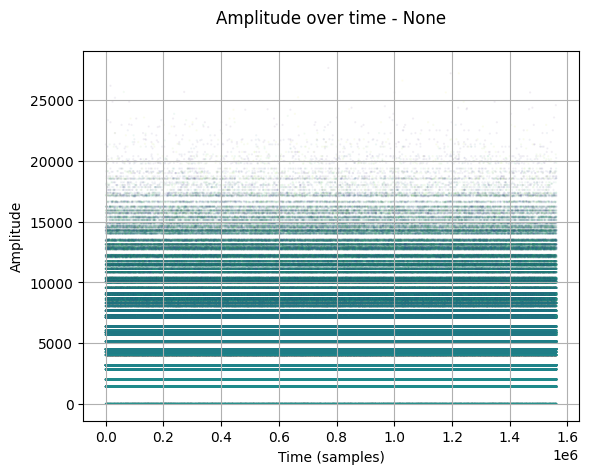

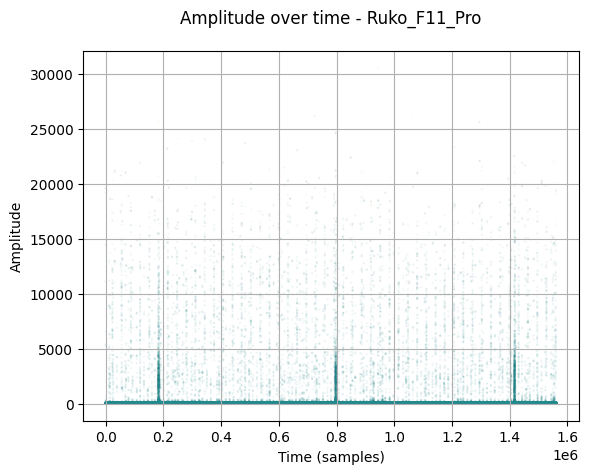

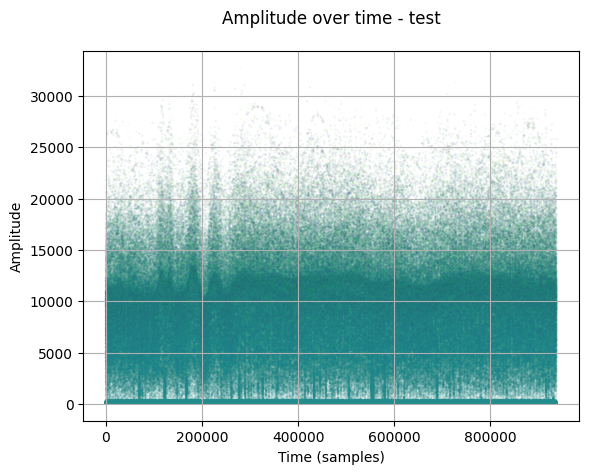

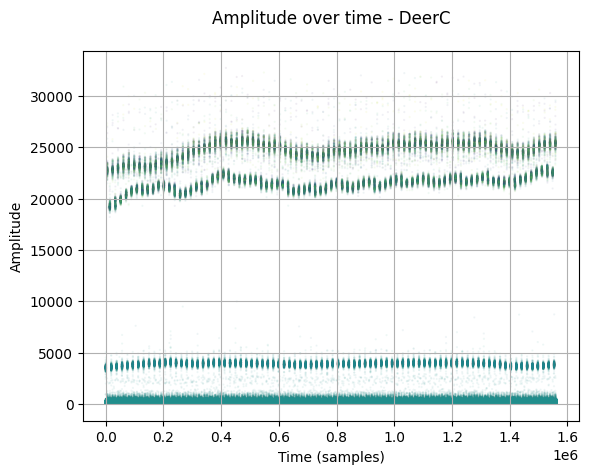

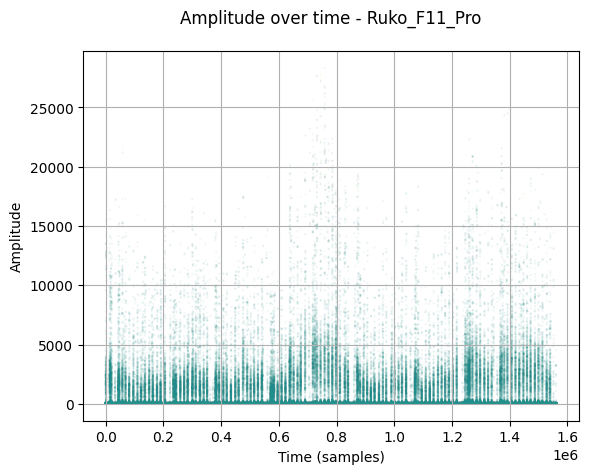

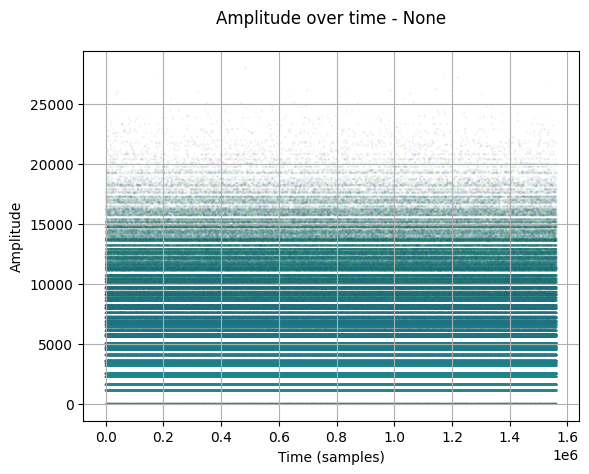

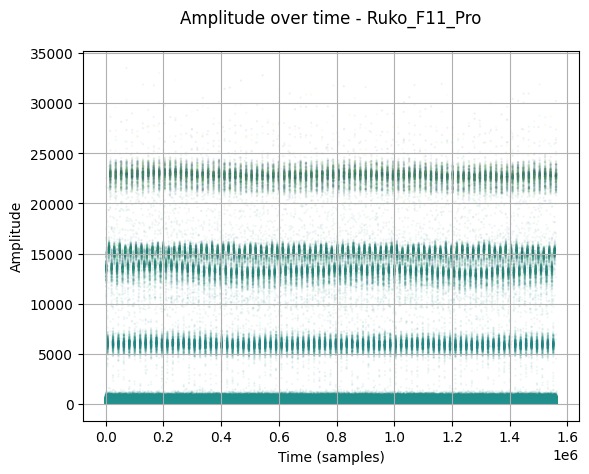

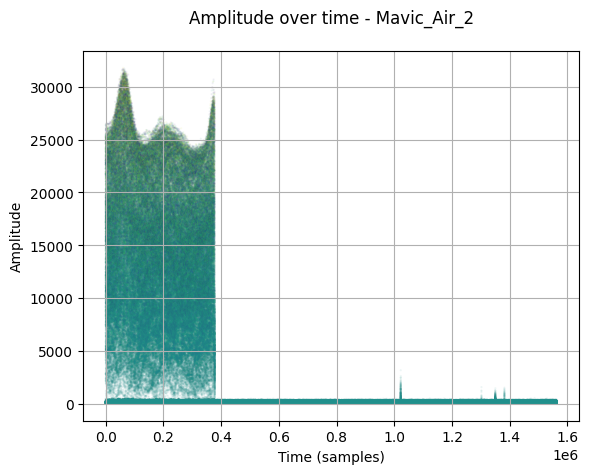

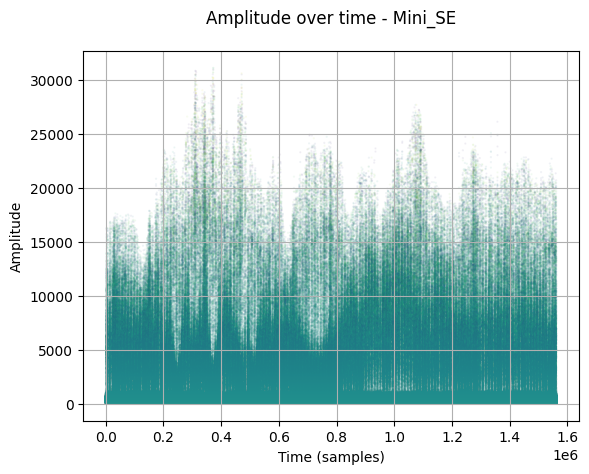

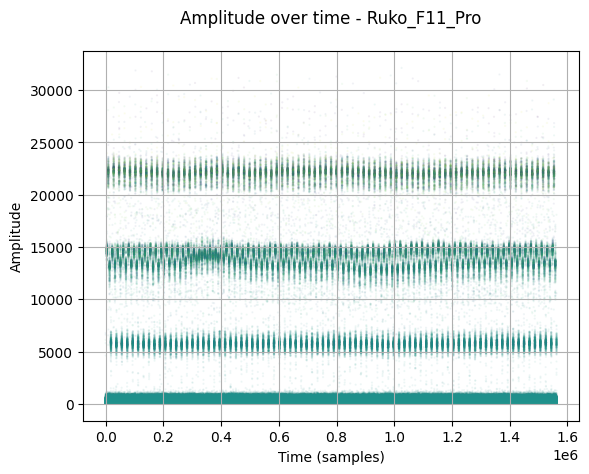

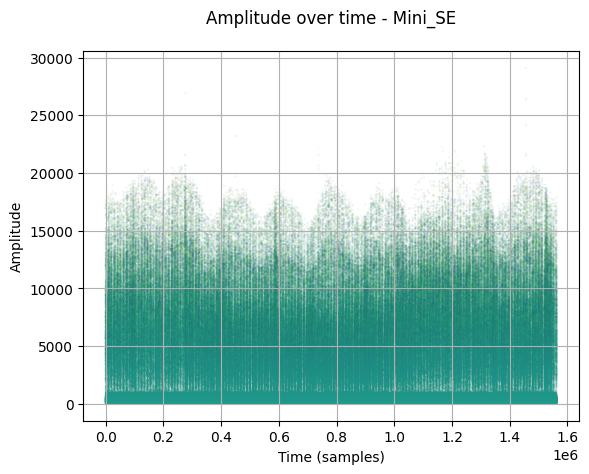

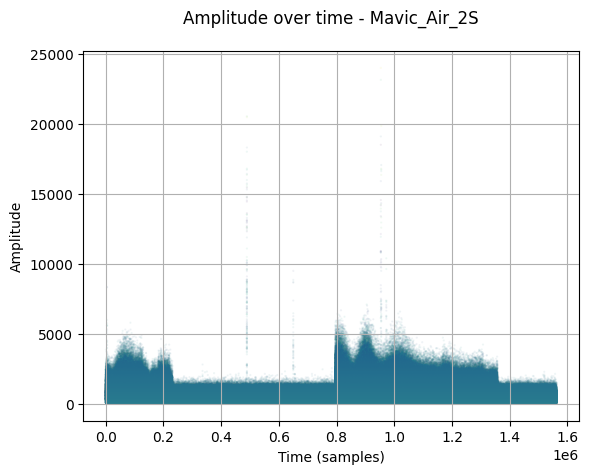

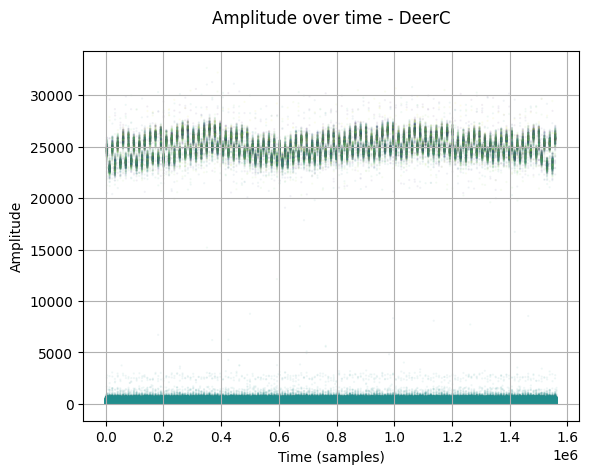

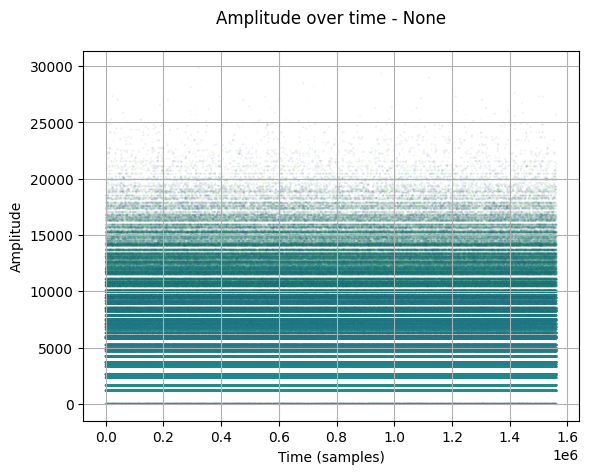

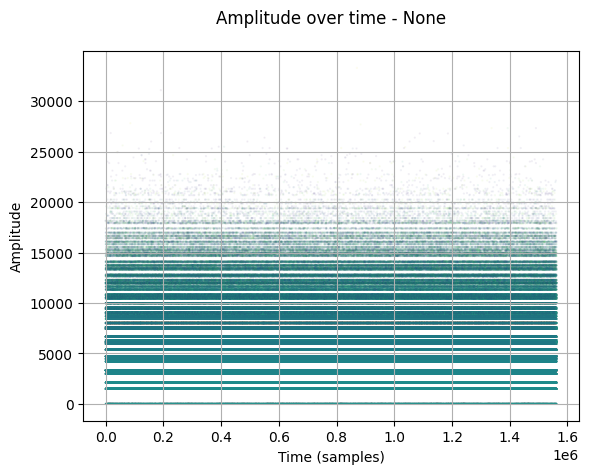

In [33]:
for f, df in zip(csv_files, dfs):
    label = get_label_from_filename(f)
    x = df.index
    y = np.sqrt(df['i']**2 + df['q']**2)
    t = df['q']

    plt.figure()
    sc = plt.scatter(x, y, c=t, s=0.4, alpha=0.06)
    plt.title(f"Amplitude over time - {label}", pad=20)
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.savefig(os.path.join(output_dir, f"amplitude_time_plot_{os.path.basename(f).replace("csv", "png")}"), bbox_inches='tight', dpi=200)
    plt.show()

### *In-Phase over time*

In [ ]:
%%script false --no-raise-error # uncomment this to skip execution of this cell

for f, df in zip(csv_files, dfs):
    label = get_label_from_filename(f)
    x = df.index
    y = df['i']
    t = df['q']

    plt.figure()
    sc = plt.scatter(x, y, c=t, s=0.4, alpha=0.4)
    plt.title(f"inphase over time - {label}", pad=20)
    plt.xlabel("Time (samples)")
    plt.ylabel("In-Phase (I)")
    plt.grid(True)

    plt.savefig(os.path.join(output_dir, f"i_time_plot_{os.path.basename(f).replace("csv", "png")}"), bbox_inches='tight', dpi=200)
    plt.show()

### *Quadrature phase over time*

In [ ]:
%%script false --no-raise-error # uncomment this to skip execution of this cell

for f, df in zip(csv_files, dfs):
    label = get_label_from_filename(f)
    x = df.index
    y = df['q']
    t = df['i']

    plt.figure()
    sc = plt.scatter(x, y, c=t, s=0.4, alpha=0.4)
    plt.title(f"Quadrature phase over time - {label}", pad=20)
    plt.xlabel("Time (samples)")
    plt.ylabel("Quadrature Phase (Q)")
    plt.grid(True)

    plt.savefig(os.path.join(output_dir, f"q_time_plot_{os.path.basename(f).replace("csv", "png")}"), bbox_inches='tight', dpi=200)
    plt.show()